# Analysis of the demographics


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 15})

df_to_create = pd.read_csv("../results/otherconfounding.csv")
df_to_create.head()

ID           PART  AGE AGE_RANGE GENDER                JOB_POSITION  \
0   2  1st SC Chaoss   24     24-27   Male              Degree Student   
1   6  1st SC Chaoss   34     32-35   Male                   Developer   
2  10  1st SC Chaoss   55     52-55   Male  Telecomunications Engineer   
3  12  1st SC Chaoss   32     32-35   Male                   Developer   
4  13  1st SC Chaoss   28     28-31   Male                 PhD Student   

    EXP_PRG    EXP_DATAVIZ YEARS_PRG YEARS_DATAVIZ  ... CORR_SC_AVG  \
0  Advanced       Beginner      7-10            <1  ...         1.0   
1    Expert  Knowledgeable       10+           4-6  ...         1.0   
2    Expert       Advanced       10+          7-10  ...         1.0   
3    Expert  Knowledgeable       10+           1-3  ...         1.0   
4  Advanced       Advanced       4-6           4-6  ...         1.0   

  CORR_VR_AVG CORR_P1_AVG CORR_P2_AVG  CORR_TOTAL_AVG  TIMING_TOTAL_VR  \
0        0.93         1.0        0.93            0.97            14:52   
1        1.00         1.0        1.00            1.00            12:23   
2        1.00         1.0        1.00            1.00            13:17   
3        1.00         1.0        1.00            1.00            10:03   
4        1.00         1.0        1.00            1.00            12:59   

   TIMING_TOTAL_SC  TIMING_TOTAL_P1  TIMING_TOTAL_P2 TIMING_TOTAL  
0            21:36            21:36            14:52        36:28  
1            17:55            17:55            12:23        30:18  
2            12:04            12:04            13:17        25:21  
3            13:40            13:40            10:03        23:43  
4            13:58            13:58            12:59        26:57  

[5 rows x 24 columns]

In [3]:
# To seconds

df_to_create['TOTAL_P1 sec'] = pd.to_timedelta(['00:'+i for i in df_to_create['TIMING_TOTAL_P1']]).total_seconds()
df_to_create['TOTAL_P2 sec'] = pd.to_timedelta(['00:'+i for i in df_to_create['TIMING_TOTAL_P2']]).total_seconds()
df_to_create['TOTAL_VR sec'] = pd.to_timedelta(['00:'+i for i in df_to_create['TIMING_TOTAL_VR']]).total_seconds()
df_to_create['TOTAL_SC sec'] = pd.to_timedelta(['00:'+i for i in df_to_create['TIMING_TOTAL_SC']]).total_seconds()
df_to_create['TOTAL sec'] = pd.to_timedelta(['00:'+i for i in df_to_create['TIMING_TOTAL']]).total_seconds()

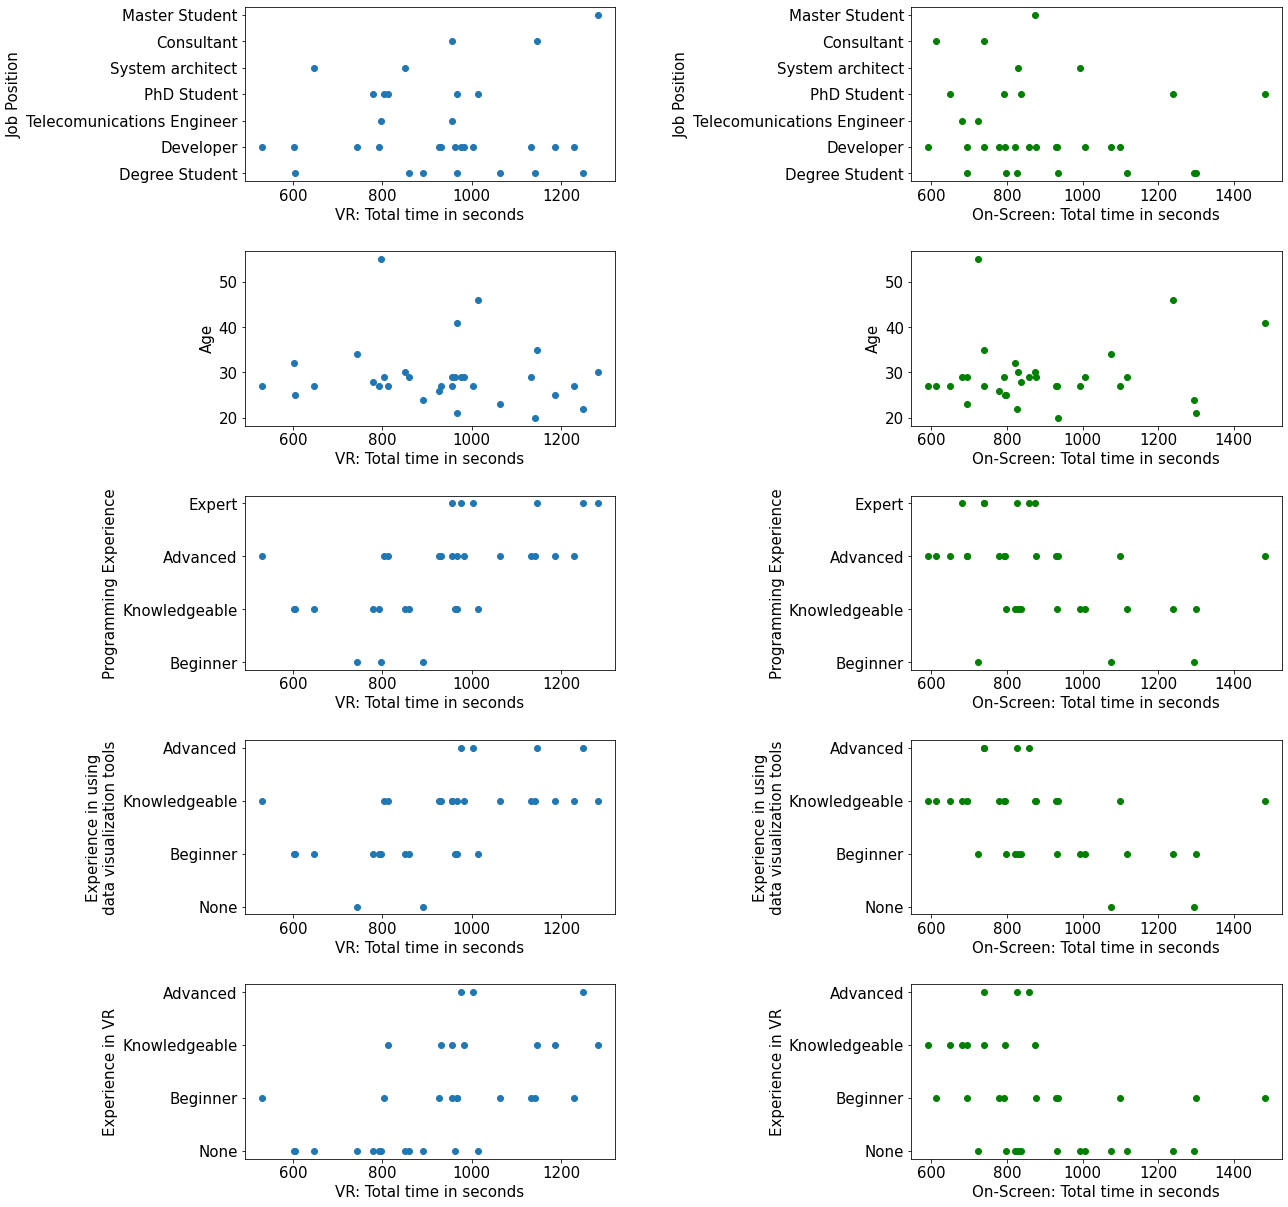

In [4]:
# Timing

fig = plt.figure(figsize=(18, 20))
plt.subplots_adjust(hspace=0.4)

plt.subplot(5, 2, 1)
plt.plot(df_to_create['TOTAL_VR sec'], df_to_create['JOB_POSITION'], 'o')
plt.ylabel("Job Position")
plt.xlabel("VR: Total time in seconds")

plt.subplot(5, 2, 2)
plt.plot(df_to_create['TOTAL_SC sec'], df_to_create['JOB_POSITION'], 'o', color="green")
plt.ylabel("Job Position")
plt.xlabel("On-Screen: Total time in seconds")


plt.subplot(5, 2, 3)
#df_age = df_to_create[['AGE']].copy()
#order = ['20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '41', '46', '55']
#df_age['AGE'] = pd.Categorical(df_age['AGE'], order)
#df_age.sort_values(by=['AGE'], inplace=True)
plt.plot(df_to_create['TOTAL_VR sec'], df_to_create['AGE'], 'o')
plt.ylabel("Age")
plt.xlabel("VR: Total time in seconds")

plt.subplot(5, 2, 4)
#df_age = df_to_create[['AGE']].copy()
#order = ['20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '41', '46', '55']
#df_age['AGE'] = pd.Categorical(df_age['AGE'], order)
#df_age.sort_values(by=['AGE'], inplace=True)
plt.plot(df_to_create['TOTAL_SC sec'], df_to_create['AGE'], 'o', color="green")
plt.ylabel("Age")
plt.xlabel("On-Screen: Total time in seconds")




plt.subplot(5, 2, 5)
order = ['Beginner', 'Knowledgeable', 'Advanced', 'Expert']
EXP_PRG = df_to_create[['EXP_PRG']].copy()
EXP_PRG['EXP_PRG'] = pd.Categorical(EXP_PRG['EXP_PRG'], order)
EXP_PRG.sort_values(by=['EXP_PRG'], inplace=True)
plt.plot(df_to_create['TOTAL_VR sec'], EXP_PRG['EXP_PRG'], 'o')
plt.ylabel("Programming Experience")
plt.xlabel("VR: Total time in seconds")

plt.subplot(5, 2, 6)
order = ['Beginner', 'Knowledgeable', 'Advanced', 'Expert']
EXP_PRG = df_to_create[['EXP_PRG']].copy()
EXP_PRG['EXP_PRG'] = pd.Categorical(EXP_PRG['EXP_PRG'], order)
EXP_PRG.sort_values(by=['EXP_PRG'], inplace=True)
plt.plot(df_to_create['TOTAL_SC sec'], EXP_PRG['EXP_PRG'], 'o', color="green")
plt.ylabel("Programming Experience")
plt.xlabel("On-Screen: Total time in seconds")




plt.subplot(5, 2, 7)
order = ['None', 'Beginner', 'Knowledgeable', 'Advanced']
EXP_DATAVIZ = df_to_create[['EXP_DATAVIZ']].copy()
EXP_DATAVIZ['EXP_DATAVIZ'] = pd.Categorical(EXP_DATAVIZ['EXP_DATAVIZ'], order)
EXP_DATAVIZ.sort_values(by=['EXP_DATAVIZ'], inplace=True)
plt.plot(df_to_create['TOTAL_VR sec'], EXP_DATAVIZ['EXP_DATAVIZ'], 'o')
plt.ylabel("Experience in using\ndata visualization tools")
plt.xlabel("VR: Total time in seconds")

plt.subplot(5, 2, 8)
order = ['None', 'Beginner', 'Knowledgeable', 'Advanced']
EXP_DATAVIZ = df_to_create[['EXP_DATAVIZ']].copy()
EXP_DATAVIZ['EXP_DATAVIZ'] = pd.Categorical(EXP_DATAVIZ['EXP_DATAVIZ'], order)
EXP_DATAVIZ.sort_values(by=['EXP_DATAVIZ'], inplace=True)
plt.plot(df_to_create['TOTAL_SC sec'], EXP_DATAVIZ['EXP_DATAVIZ'], 'o', color="green")
plt.ylabel("Experience in using\ndata visualization tools")
plt.xlabel("On-Screen: Total time in seconds")





plt.subplot(5, 2, 9)
order = ['None', 'Beginner', 'Knowledgeable', 'Advanced']
EXP_VR = df_to_create[['EXP_VR']].copy()
EXP_VR['EXP_VR'] = pd.Categorical(EXP_VR['EXP_VR'], order)
EXP_VR.sort_values(by=['EXP_VR'], inplace=True)
plt.plot(df_to_create['TOTAL_VR sec'], EXP_VR['EXP_VR'], 'o')
plt.ylabel("Experience in VR")
plt.xlabel("VR: Total time in seconds")

plt.subplot(5, 2, 10)
order = ['None', 'Beginner', 'Knowledgeable', 'Advanced']
EXP_VR = df_to_create[['EXP_VR']].copy()
EXP_VR['EXP_VR'] = pd.Categorical(EXP_VR['EXP_VR'], order)
EXP_VR.sort_values(by=['EXP_VR'], inplace=True)
plt.plot(df_to_create['TOTAL_SC sec'], EXP_VR['EXP_VR'], 'o', color="green")
plt.ylabel("Experience in VR")
plt.xlabel("On-Screen: Total time in seconds")




plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.8, 
                    hspace=0.4)


plt.savefig('confounding_time.png', bbox_inches='tight')

In [9]:
# Kendall Correlation Analysis

import pandas as pd
from scipy.stats import kendalltau

# Assuming your dataframe is named 'df' and contains categorical columns and a 'TOTAL' column
categorical_columns = ['JOB_POSITION', 'AGE', 'EXP_PRG', 'EXP_DATAVIZ', "EXP_VR"]  # Replace with your actual column names
numeric_column = 'TOTAL_SC sec'  # Replace with your actual numeric column name

correlations = {}
for column in categorical_columns:
    tau, p_value = kendalltau(df_to_create[column], df_to_create[numeric_column])
    correlations[column] = {'Kendall Tau': tau, 'p-value': p_value}

correlation_df = pd.DataFrame.from_dict(correlations, orient='index')
print(correlation_df)

              Kendall Tau   p-value
JOB_POSITION    -0.050410  0.708797
AGE              0.027671  0.830563
EXP_PRG          0.336019  0.015252
EXP_DATAVIZ     -0.086642  0.537350
EXP_VR           0.054354  0.693977


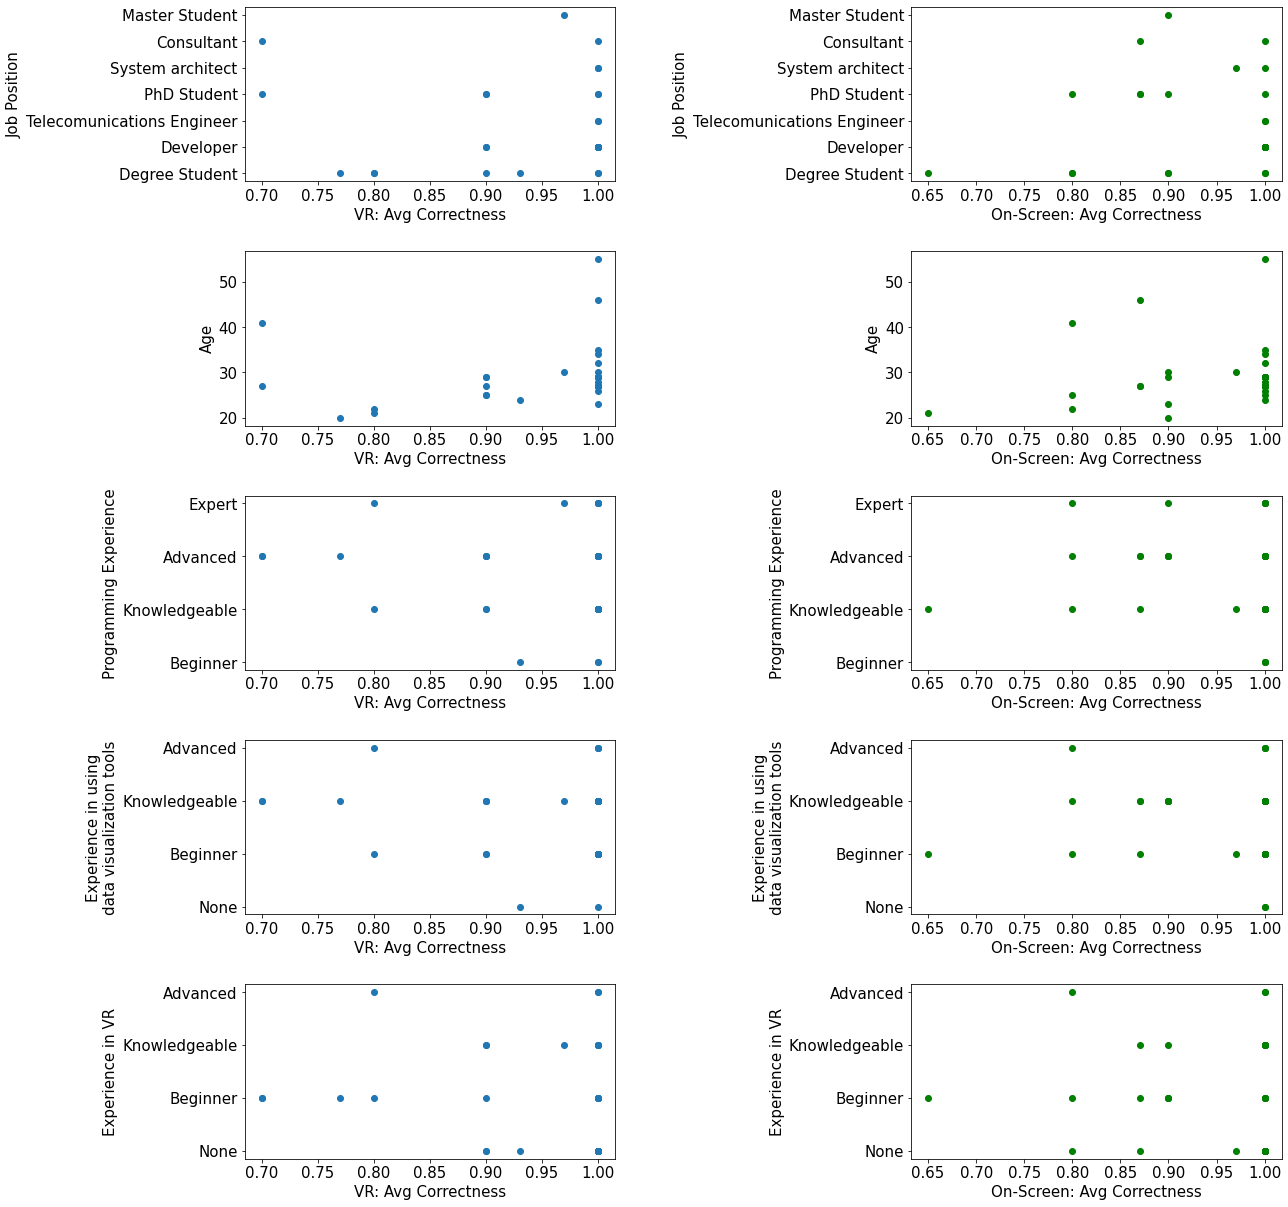

In [10]:
# Correctness

fig = plt.figure(figsize=(18, 20))
plt.subplots_adjust(hspace=0.4)

plt.subplot(5, 2, 1)
plt.plot(df_to_create['CORR_VR_AVG'], df_to_create['JOB_POSITION'], 'o')
plt.ylabel("Job Position")
plt.xlabel("VR: Avg Correctness")

plt.subplot(5, 2, 2)
plt.plot(df_to_create['CORR_SC_AVG'], df_to_create['JOB_POSITION'], 'o', color="green")
plt.ylabel("Job Position")
plt.xlabel("On-Screen: Avg Correctness")


plt.subplot(5, 2, 3)
#df_age = df_to_create[['AGE']].copy()
#order = ['20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '41', '46', '55']
#df_age['AGE'] = pd.Categorical(df_age['AGE'], order)
#df_age.sort_values(by=['AGE'], inplace=True)
plt.plot(df_to_create['CORR_VR_AVG'], df_to_create['AGE'], 'o')
plt.ylabel("Age")
plt.xlabel("VR: Avg Correctness")

plt.subplot(5, 2, 4)
#df_age = df_to_create[['AGE']].copy()
#order = ['20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '41', '46', '55']
#df_age['AGE'] = pd.Categorical(df_age['AGE'], order)
#df_age.sort_values(by=['AGE'], inplace=True)
plt.plot(df_to_create['CORR_SC_AVG'], df_to_create['AGE'], 'o', color="green")
plt.ylabel("Age")
plt.xlabel("On-Screen: Avg Correctness")




plt.subplot(5, 2, 5)
order = ['Beginner', 'Knowledgeable', 'Advanced', 'Expert']
EXP_PRG = df_to_create[['EXP_PRG']].copy()
EXP_PRG['EXP_PRG'] = pd.Categorical(EXP_PRG['EXP_PRG'], order)
EXP_PRG.sort_values(by=['EXP_PRG'], inplace=True)
plt.plot(df_to_create['CORR_VR_AVG'], EXP_PRG['EXP_PRG'], 'o')
plt.ylabel("Programming Experience")
plt.xlabel("VR: Avg Correctness")

plt.subplot(5, 2, 6)
order = ['Beginner', 'Knowledgeable', 'Advanced', 'Expert']
EXP_PRG = df_to_create[['EXP_PRG']].copy()
EXP_PRG['EXP_PRG'] = pd.Categorical(EXP_PRG['EXP_PRG'], order)
EXP_PRG.sort_values(by=['EXP_PRG'], inplace=True)
plt.plot(df_to_create['CORR_SC_AVG'], EXP_PRG['EXP_PRG'], 'o', color="green")
plt.ylabel("Programming Experience")
plt.xlabel("On-Screen: Avg Correctness")




plt.subplot(5, 2, 7)
order = ['None', 'Beginner', 'Knowledgeable', 'Advanced']
EXP_DATAVIZ = df_to_create[['EXP_DATAVIZ']].copy()
EXP_DATAVIZ['EXP_DATAVIZ'] = pd.Categorical(EXP_DATAVIZ['EXP_DATAVIZ'], order)
EXP_DATAVIZ.sort_values(by=['EXP_DATAVIZ'], inplace=True)
plt.plot(df_to_create['CORR_VR_AVG'], EXP_DATAVIZ['EXP_DATAVIZ'], 'o')
plt.ylabel("Experience in using\ndata visualization tools")
plt.xlabel("VR: Avg Correctness")

plt.subplot(5, 2, 8)
order = ['None', 'Beginner', 'Knowledgeable', 'Advanced']
EXP_DATAVIZ = df_to_create[['EXP_DATAVIZ']].copy()
EXP_DATAVIZ['EXP_DATAVIZ'] = pd.Categorical(EXP_DATAVIZ['EXP_DATAVIZ'], order)
EXP_DATAVIZ.sort_values(by=['EXP_DATAVIZ'], inplace=True)
plt.plot(df_to_create['CORR_SC_AVG'], EXP_DATAVIZ['EXP_DATAVIZ'], 'o', color="green")
plt.ylabel("Experience in using\ndata visualization tools")
plt.xlabel("On-Screen: Avg Correctness")





plt.subplot(5, 2, 9)
order = ['None', 'Beginner', 'Knowledgeable', 'Advanced']
EXP_VR = df_to_create[['EXP_VR']].copy()
EXP_VR['EXP_VR'] = pd.Categorical(EXP_VR['EXP_VR'], order)
EXP_VR.sort_values(by=['EXP_VR'], inplace=True)
plt.plot(df_to_create['CORR_VR_AVG'], EXP_VR['EXP_VR'], 'o')
plt.ylabel("Experience in VR")
plt.xlabel("VR: Avg Correctness")

plt.subplot(5, 2, 10)
order = ['None', 'Beginner', 'Knowledgeable', 'Advanced']
EXP_VR = df_to_create[['EXP_VR']].copy()
EXP_VR['EXP_VR'] = pd.Categorical(EXP_VR['EXP_VR'], order)
EXP_VR.sort_values(by=['EXP_VR'], inplace=True)
plt.plot(df_to_create['CORR_SC_AVG'], EXP_VR['EXP_VR'], 'o', color="green")
plt.ylabel("Experience in VR")
plt.xlabel("On-Screen: Avg Correctness")




plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.8, 
                    hspace=0.4)


plt.savefig('confounding_correctness.png', bbox_inches='tight')

In [11]:
# Kendall Correlation Analysis

import pandas as pd
from scipy.stats import kendalltau

# Assuming your dataframe is named 'df' and contains categorical columns and a 'TOTAL' column
categorical_columns = ['JOB_POSITION', 'AGE', 'EXP_PRG', 'EXP_DATAVIZ', "EXP_VR"]  # Replace with your actual column names
numeric_column = 'CORR_SC_AVG'  # Replace with your actual numeric column name

correlations = {}
for column in categorical_columns:
    tau, p_value = kendalltau(df_to_create[column], df_to_create[numeric_column])
    correlations[column] = {'Kendall Tau': tau, 'p-value': p_value}

correlation_df = pd.DataFrame.from_dict(correlations, orient='index')
print(correlation_df)

              Kendall Tau   p-value
JOB_POSITION     0.104167  0.492507
AGE              0.165881  0.253402
EXP_PRG          0.012381  0.936668
EXP_DATAVIZ     -0.154337  0.328973
EXP_VR          -0.322301  0.038110
